In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

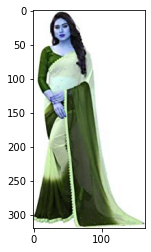

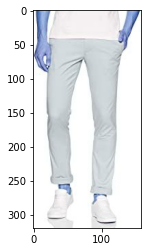

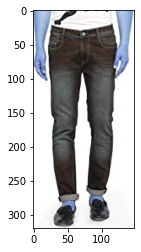

In [2]:
DATADIR = r'C:\Users\Lavanya\OneDrive\Desktop\ipnyb files\Internship\image scraping and classification\Dataset1'
CATEGORIES = ["Saree","Trousers","Jeans"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break

In [3]:
print(img_array)

[[[239 251 255]
  [126 143 162]
  [123 147 189]
  ...
  [129 145 182]
  [181 193 217]
  [237 250 255]]

 [[238 250 255]
  [126 143 162]
  [122 146 188]
  ...
  [129 145 182]
  [184 196 220]
  [236 249 255]]

 [[236 248 255]
  [125 142 161]
  [122 146 188]
  ...
  [129 145 182]
  [189 201 225]
  [236 249 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 250 250]
  [250 250 250]
  [251 251 251]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 250 250]
  [250 250 250]
  [251 251 251]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 250 250]
  [250 250 250]
  [251 251 251]]]


In [4]:
print(img_array.shape)

(320, 148, 3)


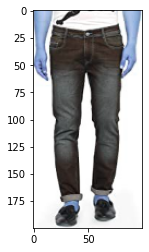

In [5]:
IMG_LENGTH = 100
IMG_HEIGHT = 200
new_array = cv2.resize(img_array,(IMG_LENGTH, IMG_HEIGHT))
plt.imshow(new_array)
plt.show()

In [6]:
train_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(IMG_LENGTH, IMG_HEIGHT))
                train_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()

In [7]:
print(len(train_data))

3243


In [8]:
# shuffling data is necessary

import random
random.shuffle(train_data)

In [9]:
# confirming that the clases are shuffled

for sample in train_data[:10]:
    print(sample[1])

0
2
2
2
0
1
2
0
1
0


In [10]:
X = []
y = []

In [11]:
for features, classes in train_data:
    X.append(features)
    y.append(classes)

# cant load features directly in the form of listto nueral networks --> coverting X to array
X= np.array(X).reshape(-1, IMG_LENGTH, IMG_HEIGHT, 3)
y = np.array(y)

In [12]:
# saving train data so that we wont lose it while tuning nueral networks

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
# Loading the saved data

pickle_in = open("X.pickle",'rb')
X = pickle.load(pickle_in)

pickle_in = open("y.pickle",'rb')
y = pickle.load(pickle_in)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [15]:
# Scaling the data

X = X/255.0

In [19]:
model = Sequential()

model.add(Conv2D(128, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,y, epochs = 4 , batch_size = 16, validation_split=0.1)

Epoch 1/4
183/183 [==============================] - 243s 1s/step - loss: 0.0000e+00 - accuracy: 0.5230 - val_loss: 0.0000e+00 - val_accuracy: 0.6554
Epoch 2/4
183/183 [==============================] - 240s 1s/step - loss: 0.0000e+00 - accuracy: 0.5898 - val_loss: 0.0000e+00 - val_accuracy: 0.6492
Epoch 3/4
183/183 [==============================] - 239s 1s/step - loss: 0.0000e+00 - accuracy: 0.6265 - val_loss: 0.0000e+00 - val_accuracy: 0.6585
Epoch 4/4
183/183 [==============================] - 240s 1s/step - loss: 0.0000e+00 - accuracy: 0.6309 - val_loss: 0.0000e+00 - val_accuracy: 0.6492
